### Suport Vektor Machine 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import Data_preparation as DP

DP=DP.Data_preparation()


from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
df=DP.load_csv_to_df("ricsData_big_v5.csv")
x_train,x_test, y_train, y_test=DP.split_data(df,0.7)

training set size: 564 samples 
test set size: 241 samples


In [10]:
model=SVC()
model.fit(x_train.values,y_train.values.ravel())

SVC()

In [11]:
pred=model.predict(x_test.values)

              precision    recall  f1-score   support

           0       0.61      0.33      0.43        84
           1       0.54      0.68      0.60        74
           2       0.57      0.70      0.63        83

    accuracy                           0.56       241
   macro avg       0.57      0.57      0.55       241
weighted avg       0.57      0.56      0.55       241

Confusion matrix
[[28 30 26]
 [ 6 50 18]
 [12 13 58]]


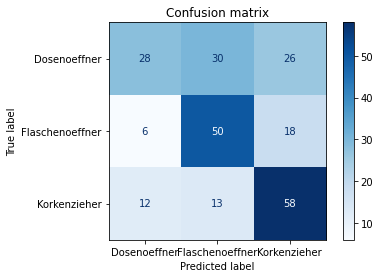

In [12]:
print(metrics.classification_report(y_test.values,pred))
np.set_printoptions(precision=2) # only to digits after the dot 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# name the classes 

### create a confusion Matrix 
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test.values,
    y_test.values,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)